# **Unsupervised classification with K-means and spectral clustering**

---



*Authors:*
*   *Zhijie He* 
*   *Sadak Mourad*
*   *Nerea Ramon*
*   *Rafano Sébastien*

*Dataset link:* https://www.openml.org/d/42111 

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

from sklearn.neighbors import kneighbors_graph
# machine learning
from sklearn.cluster import KMeans
from sklearn import metrics


In [ ]:
!wget https://www.openml.org/data/get_csv/21715140/s2.arff

--2020-11-30 21:51:42--  https://www.openml.org/data/get_csv/21715140/s2.arff
Resolving www.openml.org (www.openml.org)... 131.155.11.11
Connecting to www.openml.org (www.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘s2.arff.11’

s2.arff.11              [  <=>               ]  80.09K   391KB/s    in 0.2s    

2020-11-30 21:51:43 (391 KB/s) - ‘s2.arff.11’ saved [82016]



In [ ]:
# We verify that the files are correctly downloaded
!ls -l 

total 1012
-rw-r--r-- 1 root root 82016 Nov 30 15:26 s2.arff
-rw-r--r-- 1 root root 82016 Nov 30 19:44 s2.arff.1
-rw-r--r-- 1 root root 82016 Nov 30 21:50 s2.arff.10
-rw-r--r-- 1 root root 82016 Nov 30 21:51 s2.arff.11
-rw-r--r-- 1 root root 82016 Nov 30 19:47 s2.arff.2
-rw-r--r-- 1 root root 82016 Nov 30 20:08 s2.arff.3
-rw-r--r-- 1 root root 82016 Nov 30 20:20 s2.arff.4
-rw-r--r-- 1 root root 82016 Nov 30 20:21 s2.arff.5
-rw-r--r-- 1 root root 82016 Nov 30 20:22 s2.arff.6
-rw-r--r-- 1 root root 82016 Nov 30 20:59 s2.arff.7
-rw-r--r-- 1 root root 82016 Nov 30 21:01 s2.arff.8
-rw-r--r-- 1 root root 82016 Nov 30 21:07 s2.arff.9
drwxr-xr-x 1 root root  4096 Nov 13 17:33 sample_data


In [ ]:
df = pd.read_csv ('/content/s2.arff')

# Observe the format and content of our data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   d1      5000 non-null   int64
 1   d2      5000 non-null   int64
 2   label   5000 non-null   int64
dtypes: int64(3)
memory usage: 117.3 KB


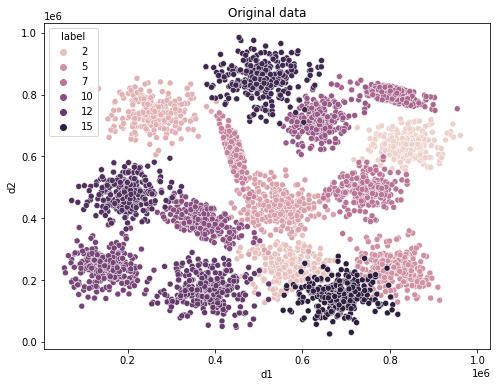

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x='d1', y='d2', data=df, hue='label')
ax.set(title='Original data');

We see that our dataset has 5000 entriee which is quite a high number of samples to process. Therefore to make the code less time consuming we proceed to cut our data into 1000 random samples.

In [ ]:
data=df.sample(n=1000,random_state=123,axis=0)
print(data)

          d1      d2  label
2648  617866  626069      9
2456  793972  784171      8
4557  449734  785924     14
4884  681528  158990     15
92    805075  559992      1
...      ...     ...    ...
4796  737036  156973     15
4337  473080  838594     14
3100  374922  401941     10
1304  807493  241644      5
4240  234863  467401     13

[1000 rows x 3 columns]


In [ ]:
data.head()

,d1,d2,label
2648,617866,626069,9
2456,793972,784171,8
4557,449734,785924,14
4884,681528,158990,15
92,805075,559992,1


In [ ]:
data.describe()

,d1,d2,label
count,1000.000000,1000.000000,1000.000000
mean,526027.605000,481222.114000,8.310000
std,217798.673178,235315.376223,4.301442
min,58050.000000,78083.000000,1.000000
25%,367749.500000,247458.000000,5.000000
50%,538064.500000,474023.000000,9.000000
75%,722061.750000,705900.250000,12.000000
max,983609.000000,936427.000000,15.000000


In [ ]:
data = data.drop(['label'], axis =1) #delete column label
print(data)

          d1      d2
2648  617866  626069
2456  793972  784171
4557  449734  785924
4884  681528  158990
92    805075  559992
...      ...     ...
4796  737036  156973
4337  473080  838594
3100  374922  401941
1304  807493  241644
4240  234863  467401

[1000 rows x 2 columns]


# **Part 1:** K-Means




## **Step 1:** We decide based on our data how many clusters should we have.
We do this by computing the silhouette parameter and the variance ratio criterion.
We want both values to be as close to 1 as possible, the closer to 1 the more dense and well separated our clusters are.

In [ ]:
for k in range(3, 30):
    kmeans= KMeans(n_clusters=k, random_state=1).fit(data)
    labels = kmeans.labels_

    silhouette1= metrics.silhouette_score(data, labels, metric = 'euclidean')
    ch1= metrics.calinski_harabasz_score(data, labels) #aka Variance Ratio Criterion
    
    print("For "+str(k)+" clusters: "+"Silhouette score = "+str(silhouette1)+"Calinski Harabasz score = "+str(ch1))

For 3 clusters: Silhouette score = 0.4268078249239296Calinski Harabasz score = 941.9929297994177
For 4 clusters: Silhouette score = 0.44252658865734346Calinski Harabasz score = 1106.0191717029297
For 5 clusters: Silhouette score = 0.43205878573933815Calinski Harabasz score = 1090.7360113851746
For 6 clusters: Silhouette score = 0.4324828603505093Calinski Harabasz score = 1082.7199547548466
For 7 clusters: Silhouette score = 0.4431625697889076Calinski Harabasz score = 1123.1672015480754
For 8 clusters: Silhouette score = 0.46663754975566846Calinski Harabasz score = 1177.0832973335762
For 9 clusters: Silhouette score = 0.486906754282227Calinski Harabasz score = 1304.363796440273
For 10 clusters: Silhouette score = 0.5172740378667361Calinski Harabasz score = 1403.7620355848308
For 11 clusters: Silhouette score = 0.5365762614370599Calinski Harabasz score = 1562.400432919823
For 12 clusters: Silhouette score = 0.5652104040626732Calinski Harabasz score = 1823.533903306432
For 13 clusters: Si

Hence the optimum number of clusters for our dataset is 15. 
Both parameters reach their highest level, with less or more number of clusters both parameters go down.


## **Step 2:** Apply the K-means method to our data set


In [ ]:
kmeans = KMeans(init='k-means++',n_clusters=15,n_init=5) # Setting this to "k-means++" employs an advanced trick to speed up convergence
model=kmeans.fit(data)
y_pred= kmeans.predict(data)


centroids = kmeans.cluster_centers_
print("We have "+str(centroids.size)+" centroids")
labels = kmeans.labels_
#print(labels)
#print('model\n', model)

We have 30 centroids


We will now plot the data with the different labels the kmeans function identified

Text(0.5, 1.0, 'K-Means Clustering')

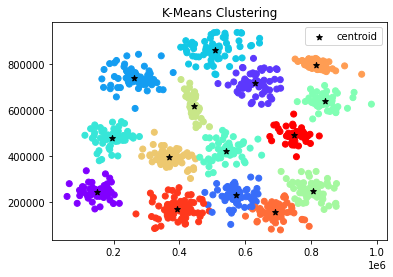

In [ ]:
plt.scatter(data.iloc[:,0],data.iloc[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(centroids[:,0] ,centroids[:,1], marker ='*', color='black', label='centroid')
plt.legend()
plt.title('K-Means Clustering')

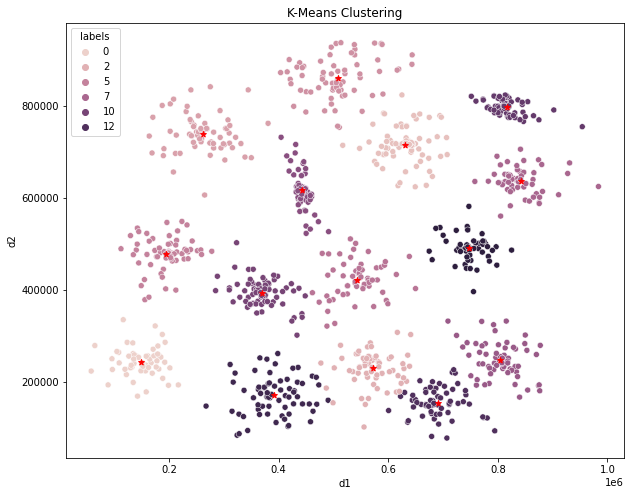

In [ ]:
data['labels'] = labels

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='d1', y='d2', data=data, hue='labels')
plt.scatter(centroids[:,0] ,centroids[:,1], marker ='*', color='red', label='centroid')

ax.set(title='K-Means Clustering');

# **Part 2:** Connectivity Graph

we normalize the data 

In [ ]:
# normalize
data = data.drop(columns='labels',axis=1)
s_norm = (data - data.min()) / (data.max() - data.min())
s_norm.shape

(1000, 2)

In [ ]:
# Calculate the distance between a and b with the euclidean norm
def get_distance(a, b):
  return np.linalg.norm(a-b)
  
# Calculate the similarity as the exponential of the square of the distance,
# considering a scaling factor of 1
def get_similarity(distance):
  return np.exp(-np.square(distance)/2)

Create Connectivity Graph

There are 8726 nodes in the graph with 400 edges


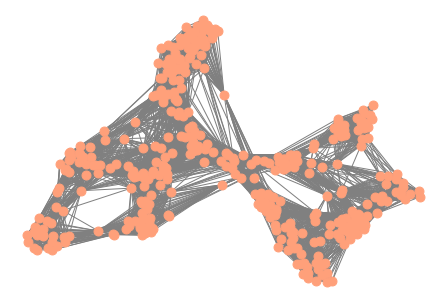

In [ ]:
G = nx.Graph()

# Loop through all combinations of rows of the dataset
min_simi = 1
for index, row in s_norm.iterrows():
  G.add_node(index)
  for index_other, row_other in s_norm.iterrows():
    if index < index_other: # ensures that each pair is analysed just once
      distance = get_distance(row.values, row_other.values)
      #print(distance)
      similarity = get_similarity(distance)
      #print(similarity)
      if similarity < min_simi:
        min_simi = similarity
      if similarity >0.98:
        G.add_edge(index, index_other, weight=similarity) # add edge to graph



print('There are %d nodes in the graph with %d edges'%(G.number_of_edges(), G.number_of_nodes()))
nx.draw(G, node_color='lightsalmon', edge_color='grey',node_size=80)

In [ ]:
print(G.nodes)

[2648, 4429, 2652, 4403, 2736, 2665, 2837, 2814, 2899, 2833, 2754, 2813, 2892, 2746, 2859, 2798, 2785, 2720, 4346, 2873, 2779, 2725, 2695, 2865, 2895, 2886, 2752, 2724, 2869, 2758, 2669, 4570, 2907, 2753, 2761, 2868, 2893, 2704, 2783, 2808, 2673, 2674, 2815, 2691, 2897, 2763, 4359, 2828, 2848, 2733, 2675, 2867, 2775, 2846, 2767, 2827, 4412, 2803, 4446, 2703, 2649, 2693, 2456, 2592, 2593, 2485, 2607, 2465, 2552, 2475, 2596, 2594, 2481, 2554, 2536, 2611, 2646, 2641, 2546, 2471, 2477, 2597, 2510, 2628, 2540, 2488, 2457, 2606, 2514, 2605, 2549, 4438, 2548, 2519, 4557, 4598, 4646, 4588, 4595, 4603, 4589, 4627, 4562, 4569, 4592, 4633, 4623, 4566, 4643, 4567, 4635, 4616, 4574, 4572, 4586, 4639, 4649, 4561, 4884, 4945, 4900, 4905, 4922, 4943, 4995, 4990, 4901, 4980, 4965, 4915, 4921, 4968, 4913, 4988, 4891, 4964, 4976, 4981, 4994, 4953, 4952, 4966, 4946, 4967, 4916, 4963, 4986, 92, 244, 193, 119, 112, 239, 2196, 2229, 2075, 118, 248, 2001, 2142, 2601, 146, 202, 2155, 2044, 288, 115, 152, 298, 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


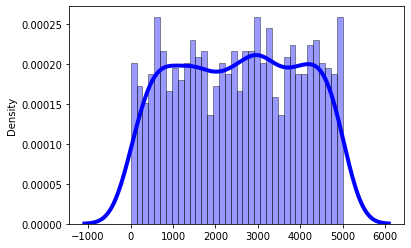

In [ ]:
# Density Plot and Histogram 
sns.distplot(G.nodes, hist=True, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

**Two ways to construct the Adjacency Matrix**

The first method based on Eculidean distance

In [ ]:
# Based on Eculidean Distance
def get_adjacency_matrix(data):
  # reset the index
  data = data.reset_index().drop('index',axis=1)

  adjacency_matrix = np.zeros([data.shape[0],data.shape[0]],dtype=float)
  for index, row in data.iterrows():
    for index_other, row_other in data.iterrows():
      if index < index_other: # ensures that each pair is analysed just once
        distance = get_distance(row.values, row_other.values)
        similarity = get_similarity(distance)
        adjacency_matrix[index_other, index] = similarity
        adjacency_matrix[index, index_other] = similarity
  
  return adjacency_matrix

The second method is based on nearest neighbours

In [ ]:
# Based on nearest neighbours
def get_Kneighbour_adjacency_matrix(data, nn):
  connectivity = kneighbors_graph(X=data, n_neighbors=nn, mode='connectivity')
  adjacency_matrix = (1/2)*(connectivity + connectivity.T).toarray()
  return adjacency_matrix

# **Part 3:** Spectral Clustering

Two ways to get adjacency_matrix

In [ ]:
#adjacency_matrix = get_adjacency_matrix(s_norm)
adjacency_matrix = get_Kneighbour_adjacency_matrix(s_norm,8)
W = adjacency_matrix
print(W)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


We already have the adjacency matrix W, so now we construct the degree matrix.

**Degree matrix D:** We fill the diagonal of the degree matrix with the sum of the elements of each row of the adjency matrix

In [ ]:
D = np.diag(W.sum(axis=1))
print(D)

[[ 6.   0.   0.  ...  0.   0.   0. ]
 [ 0.   7.5  0.  ...  0.   0.   0. ]
 [ 0.   0.   5.5 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  8.   0.   0. ]
 [ 0.   0.   0.  ...  0.  11.   0. ]
 [ 0.   0.   0.  ...  0.   0.   8.5]]


**Laplacian matrix:**
L=D-W

In [ ]:
L = D - W
print(L)

[[ 6.   0.   0.  ...  0.   0.   0. ]
 [ 0.   7.5  0.  ...  0.   0.   0. ]
 [ 0.   0.   5.5 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  8.   0.   0. ]
 [ 0.   0.   0.  ...  0.  11.   0. ]
 [ 0.   0.   0.  ...  0.   0.   8.5]]


**Normalized Laplacian Matrix**

In [ ]:
for i in range(D.shape[0]):
  D[i,i] = D[i,i]**(-1/2)

L_s = D.dot(L).dot(D)
print(L_s)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


**Eigenvalues & Eigenvectors**

In [ ]:
# find eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(L_s)

We then sort the eigenvalues in ascending order.

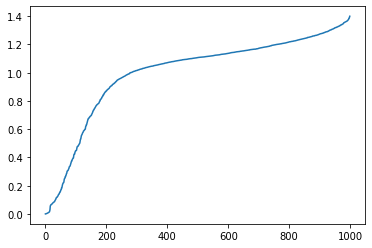

In [ ]:
# sort these based on the eigenvalues
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]
eigenvals_sorted_indices = np.argsort(vals)

#draw the eigenvalue chart
plt.plot(vals)

Now we evaluate the number of clusters we should have. We do this y the eigengap method.
Eigengap suggests that the number of clusters k is usually given by the value of k that maximizes the eigengap (difference between consecutive eigenvalues). The larger this eigengap is, the closer the eigenvectors of the ideal case and hence the better spectral clustering works.

In [ ]:
def predict_k(matrix):
  max_gap = 0
  gap_pre_index = 0
  
  for i in range(1, vals.size):
    gap = vals[i] - vals[i - 1]
    
    if gap > max_gap:
      max_gap = gap
      gap_pre_index = i - 1
      k = gap_pre_index + 1

  return k

print("The optimum number of clusters is: " +str(predict_k(W)))

The optimum number of clusters is: 16


Now that we know the number of clusters we proceed to take the 15 smallest eigenvectors as they can be used to describe cluster properties of the data

In [ ]:
indices = eigenvals_sorted_indices[: 15]
proj_df = pd.DataFrame(vecs[:, indices.squeeze()])
proj_df.columns = ['v_' + str(c) for c in proj_df.columns]

proj_df

,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0.027386,-0.047650,0.033207,0.027676,-0.019341,0.018523,-0.027615,-0.010874,-0.019707,0.008024,0.013404,-0.001445,0.065765,0.005640,0.000154
1,0.030619,0.063711,0.072251,-0.014329,-0.037757,-0.053022,-0.010922,0.000383,-0.011420,-0.018389,0.006123,0.000551,-0.000374,0.002652,-0.000079
2,0.026220,-0.039270,0.024725,0.013108,-0.004938,0.000638,0.001646,0.001334,0.006295,-0.004612,-0.009585,0.001009,-0.056015,-0.003808,0.000075
3,0.032596,0.015424,-0.035090,0.043187,-0.021371,-0.014431,0.016583,0.005774,-0.004056,0.019617,0.002633,0.064416,-0.000879,0.013633,-0.090765
4,0.025000,0.032518,0.023667,0.003837,0.024454,0.056240,0.013611,-0.000538,0.018282,0.031350,-0.009862,-0.000733,0.000278,-0.000640,-0.000153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.033541,0.016572,-0.035895,0.047379,-0.021891,-0.013706,0.023684,0.009773,-0.014629,0.017175,-0.002615,0.043378,-0.000404,0.009193,-0.090507
996,0.030619,-0.047195,0.030244,0.017440,-0.008303,0.003161,-0.000909,0.001528,0.006492,-0.006331,-0.012623,0.001713,-0.088867,-0.008197,-0.000237
997,0.031623,0.001324,-0.019786,-0.024468,0.022354,-0.006423,-0.062499,0.052620,-0.016141,0.009284,-0.046006,-0.006212,-0.000876,0.037030,-0.002969
998,0.037081,0.020786,-0.037341,0.059801,-0.020629,-0.007496,0.048269,0.024098,-0.055476,-0.002736,-0.024560,-0.083951,0.002119,-0.020061,0.032845


Now we run K-Means Clustering

In [ ]:
k_means = KMeans(random_state=25,n_clusters=15)
k_means.fit(proj_df)
cluster = k_means.predict(proj_df)

Finally we add the cluster tag to each point.

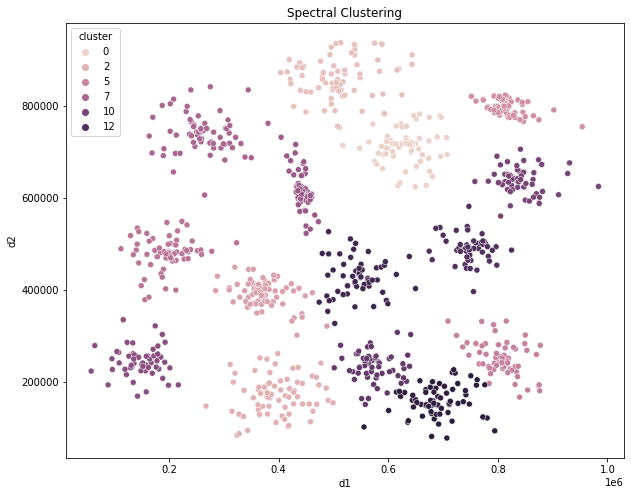

In [ ]:
data['cluster'] = cluster

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='d1', y='d2', data=data, hue='cluster', ax=ax)
ax.set(title='Spectral Clustering');

In [ ]:
# get the number of every clusters
data.cluster.value_counts()

3     83
2     76
1     75
0     74
14    72
7     69
6     69
5     66
4     65
8     64
11    61
13    58
12    57
9     56
10    55
Name: cluster, dtype: int64

# **Part 4:** Comparison between the two methods

**K-means**

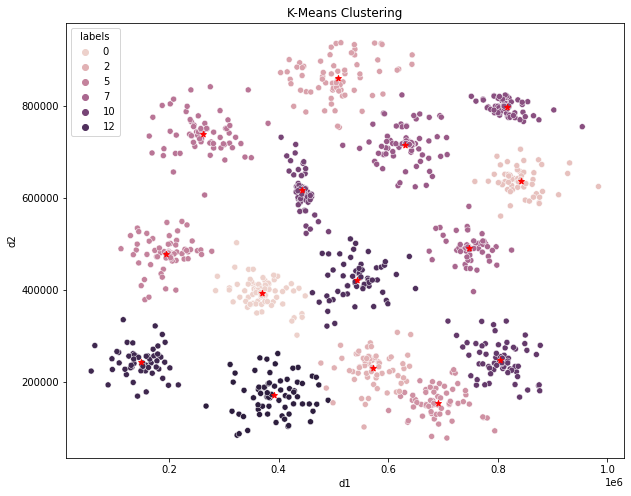

In [ ]:
data['labels'] = labels

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='d1', y='d2', data=data, hue='labels')
plt.scatter(centroids[:,0] ,centroids[:,1], marker ='*', color='red', label='centroid')
ax.set(title='K-Means Clustering');

In [ ]:
# get the number of every clusters
data.labels.value_counts()

0     82
8     77
14    73
3     72
11    70
6     69
5     68
2     67
10    65
9     65
4     65
12    59
7     57
13    56
1     55
Name: labels, dtype: int64

**Spectral clustering**

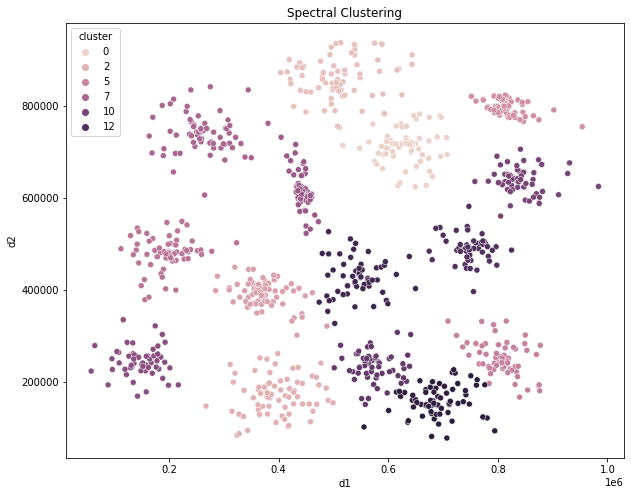

In [ ]:
data['cluster'] = cluster

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='d1', y='d2', data=data, hue='cluster', ax=ax)
ax.set(title='Spectral Clustering');

In [ ]:
data.cluster.value_counts()

3     83
2     76
1     75
0     74
14    72
7     69
6     69
5     66
4     65
8     64
11    61
13    58
12    57
9     56
10    55
Name: cluster, dtype: int64

# **Part 5:** Conclusion

As we can see by looking at the plots, both methods give almost the same result. 

The number of clusters optimum for each method is the same and if we also look at the number of samples in each cluster we can see that they barely differ.

We have the advantage that our data is separated into clusters that are very noticeable (most of them) so probably for a dataset where the samples are not that separated both methods would have resulted in different solutions.